In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [11]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [12]:
#  3. Convert the June temperatures to a list.
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()


In [13]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd
june_df = pd.DataFrame(results, columns=["Date", "June Temps"])
june_df

,Date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [14]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [15]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [16]:
# 7. Convert the December temperatures to a list.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [18]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=["Date", "December Temps"])
dec_df

,Date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [19]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Additional Analysis and Queries

<AxesSubplot:>

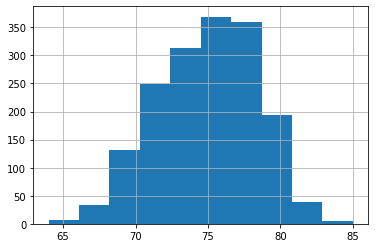

In [33]:
june_df["June Temps"].hist()

<AxesSubplot:>

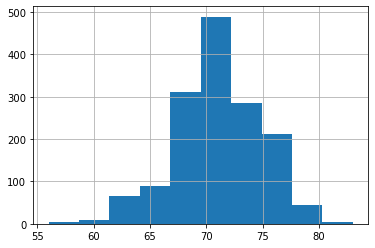

In [34]:
dec_df["December Temps"].hist()

## Average Temperature and Number of Recordings by Station

In [ ]:
june_results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [47]:
june_station_results = session.query(Measurement.station, func.count(Measurement.station), 
                                     func.avg(Measurement.tobs)).\
filter(extract("month", Measurement.date)==6).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

june_station_df = pd.DataFrame(june_station_results, 
                               columns=["Station", "Number of Recordings", "June Average Temperature"])
june_station_df

,Station,Number of Recordings,June Average Temperature
0,USC00519397,236,77.559322
1,USC00519281,236,73.271186
2,USC00513117,236,74.050847
3,USC00519523,232,76.668103
4,USC00516128,223,71.937220
5,USC00514830,186,76.005376
6,USC00511918,165,74.139394
7,USC00517948,148,76.655405
8,USC00518838,38,73.394737


In [46]:
june_station_results = session.query(Measurement.station, func.count(Measurement.station), 
                                     func.avg(Measurement.tobs)).\
filter(extract("month", Measurement.date)==12).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

dec_station_df = pd.DataFrame(june_station_results, 
                              columns=["Station", "Number of Recordings", "December Average Temperature"])
dec_station_df

,Station,Number of Recordings,December Average Temperature
0,USC00519281,217,69.903226
1,USC00513117,216,71.069444
2,USC00519523,210,72.433333
3,USC00519397,210,71.109524
4,USC00516128,206,69.291262
5,USC00514830,178,73.224719
6,USC00511918,152,69.684211
7,USC00517948,109,71.834862
8,USC00518838,19,72.421053
